In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# System parameters
chi = 1
Theta0 = 2

# Define the correlation function c(t)
def c(t):
    delta = chi**2 - 2 * Theta0 * chi

    if delta > 0:
        d = np.sqrt(delta)
        return np.exp(-chi * t / 2) * (np.cosh(d * t / 2) + (chi / d) * np.sinh(d * t / 2))

    elif delta == 0:
        return np.exp(-chi * t / 2) * (1 + (chi * t) / 2)

    else:
        d = np.sqrt(-delta)
        return np.exp(-chi * t / 2) * (np.cos(d * t / 2) + (chi / d) * np.sin(d * t / 2))

def Theta(t, dt=1e-4):
    c_t = c(t)
    c_dot = (c(t + dt) - c_t) / dt
    return -2 * np.real(c_dot / c_t)

def S(t, dt=1e-4):
    c_t = c(t)
    c_dot = (c(t + dt) - c_t) / dt
    return -2 * np.imag(c_dot / c_t)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the differential equation
def rho_11(t, x, chi):
    theta_t = np.sin(t)  # Theta function (sin function)
    factor = np.exp(1j * chi) + 1  # e^(i*0.2) + 1
    dxdt = 0.5 * (1 + theta_t * factor * x)
    return dxdt

# Define the time span and initial condition
t_span = (0, 10)  # Time from 0 to 10
t_eval = np.linspace(0, 10, 500)  # 500 time points for smooth evolution
x0 = [1 + 0j]  # Initial condition as a complex number
chi_vals = np.linspace(-np.pi, np.pi, 10)

# Solve the ODE
rho_chis_11 = [solve_ivp(rho_11, t_span, x0, t_eval=t_eval, args=(chi,)) for chi in chi_vals]

# # Extract real and imaginary parts for plotting
# t_vals = sol.t
# x_vals = sol.y[0]

# # Plot the real and imaginary parts
# plt.figure(figsize=(10, 5))
# plt.plot(t_vals, x_vals.real, label="Re(x)", color="blue")
# plt.plot(t_vals, x_vals.imag, label="Im(x)", color="red", linestyle="dashed")
# plt.xlabel("Time t")
# plt.ylabel("x(t)")
# plt.title("Time Evolution of x(t)")
# plt.legend()
# plt.grid()
# plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# System parameters
chi = 1
Theta0 = 2

# Define the correlation function c(t)
def c(t):
    delta = chi**2 - 2 * Theta0 * chi

    if delta > 0:
        d = np.sqrt(delta)
        return np.exp(-chi * t / 2) * (np.cosh(d * t / 2) + (chi / d) * np.sinh(d * t / 2))

    elif delta == 0:
        return np.exp(-chi * t / 2) * (1 + (chi * t) / 2)

    else:
        d = np.sqrt(-delta)
        return np.exp(-chi * t / 2) * (np.cos(d * t / 2) + (chi / d) * np.sin(d * t / 2))

def Theta(t, dt=1e-4):
    c_t = c(t)
    c_dot = (c(t + dt) - c_t) / dt
    return -2 * np.real(c_dot / c_t)

def S(t, dt=1e-4):
    c_t = c(t)
    c_dot = (c(t + dt) - c_t) / dt
    return -2 * np.imag(c_dot / c_t)


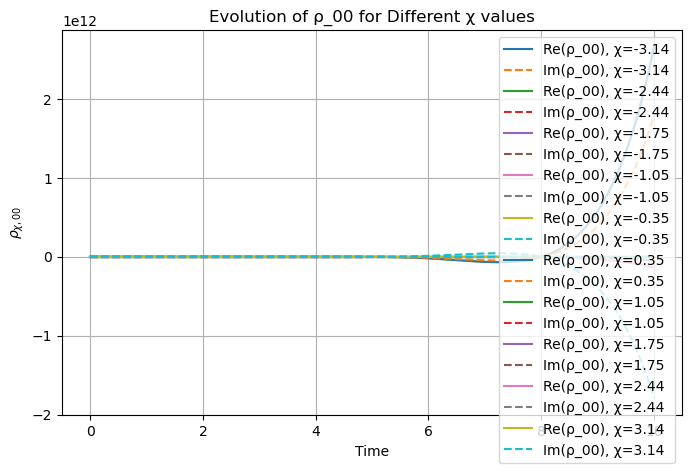

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# System parameters
chi = 0.5
Theta0 = 1

# Define the correlation function c(t)
def c(t):
    delta = chi**2 - 2 * Theta0 * chi

    if delta > 0:
        d = np.sqrt(delta)
        return np.exp(-chi * t / 2) * (np.cosh(d * t / 2) + (chi / d) * np.sinh(d * t / 2))

    elif delta == 0:
        return np.exp(-chi * t / 2) * (1 + (chi * t) / 2)

    else:
        d = np.sqrt(-delta)
        return np.exp(-chi * t / 2) * (np.cos(d * t / 2) + (chi / d) * np.sin(d * t / 2))

# Define theta(t) using the provided Theta function
def Theta(t, dt=1e-4):
    c_t = c(t)
    c_dot = (c(t + dt) - c_t) / dt
    return -2 * np.real(c_dot / c_t)

def S(t, dt=1e-4):
    c_t = c(t)
    c_dot = (c(t + dt) - c_t) / dt
    return -2 * np.imag(c_dot / c_t)

# Define the differential equation for rho_11
def rho_11_real(t, y, chi):
    x_real, x_imag = y
    theta_t = Theta(t)  # Use the actual theta function
    factor = np.exp(1j * chi) + 1

    dx_real = 0.5 * (1 + theta_t * (factor.real * x_real - factor.imag * x_imag))
    dx_imag = 0.5 * theta_t * (factor.real * x_imag + factor.imag * x_real)

    return [dx_real, dx_imag]

# Define the differential equation for rho_00
def rho_00_real(t, y, rho_11_t, chi):
    x_real, x_imag = y
    theta_t = Theta(t)  # Use the actual theta function
    factor = np.exp(1j * chi) + 1

    dx_real = 0.5 * (1 - theta_t * (factor.real * rho_11_t.real - factor.imag * rho_11_t.imag))
    dx_imag = 0.5 * theta_t * (factor.real * rho_11_t.imag + factor.imag * rho_11_t.real)

    return [dx_real, dx_imag]

# Define the time span and initial condition
t_span = (0, 10)
t_eval = np.linspace(0, 10, 500)  
x0 = [1.0, 0.0]  # Initial condition (1 + 0j split into real & imaginary parts)
chi_vals = np.linspace(-np.pi, np.pi, 10)  # Different chi values

# Solve rho_11 for each chi
rho_chis_11 = [solve_ivp(rho_11_real, t_span, x0, t_eval=t_eval, args=(chi,)) for chi in chi_vals]

# Convert results to complex form
rho_chis_11_complex = [sol.y[0] + 1j * sol.y[1] for sol in rho_chis_11]

from scipy.interpolate import interp1d

rho_chis_00 = []
for i in range(len(chi_vals)):
    # Extract actual time points and solutions from solve_ivp
    t_rho_11 = rho_chis_11[i].t
    y_rho_11_real = rho_chis_11[i].y[0]  # Real part
    y_rho_11_imag = rho_chis_11[i].y[1]  # Imaginary part

    # Interpolate only at the available time points
    rho_11_interp_real = interp1d(t_rho_11, y_rho_11_real, kind="cubic", fill_value="extrapolate")
    rho_11_interp_imag = interp1d(t_rho_11, y_rho_11_imag, kind="cubic", fill_value="extrapolate")

    # Modified function for solve_ivp
    def rho_00_real_interp(t, y, chi):
        rho_11_t = rho_11_interp_real(t) + 1j * rho_11_interp_imag(t)  # Interpolated value
        return rho_00_real(t, y, rho_11_t, chi)

    # Solve using the modified function
    sol = solve_ivp(rho_00_real_interp, t_span, x0, t_eval=t_eval, args=(chi_vals[i],))
    rho_chis_00.append(sol)

# Convert results to complex form
rho_chis_00_complex = [sol.y[0] + 1j * sol.y[1] for sol in rho_chis_00]

plt.figure(figsize=(8, 5))

# Iterate over each chi value and plot rho_00 evolution
for i, chi in enumerate(chi_vals):
    t_vals = rho_chis_00[i].t  # Time points from solve_ivp
    rho_00_real = rho_chis_00_complex[i].real
    rho_00_imag = rho_chis_00_complex[i].imag

    plt.plot(t_vals, rho_00_real, label=f"Re(ρ_00), χ={chi:.2f}")
    plt.plot(t_vals, rho_00_imag, linestyle="dashed", label=f"Im(ρ_00), χ={chi:.2f}")

plt.xlabel("Time")
plt.ylabel(r"$\rho_{\chi,00}$")
plt.legend()
plt.title("Evolution of ρ_00 for Different χ values")
plt.grid()
plt.show()



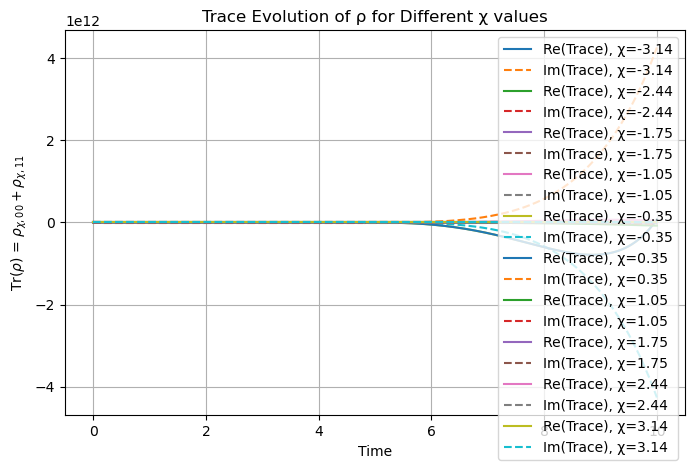

In [16]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Iterate over each chi value and plot the trace evolution
for i, chi in enumerate(chi_vals):
    t_vals = t_eval  # Ensure we use the same time points

    # Interpolate rho_chis_00 onto t_eval
    rho_00_interp_real = interp1d(rho_chis_00[i].t, rho_chis_00_complex[i].real, kind="cubic", fill_value="extrapolate")(t_eval)
    rho_00_interp_imag = interp1d(rho_chis_00[i].t, rho_chis_00_complex[i].imag, kind="cubic", fill_value="extrapolate")(t_eval)

    # Interpolate rho_chis_11 onto t_eval
    rho_11_interp_real = interp1d(rho_chis_11[i].t, rho_chis_11_complex[i].real, kind="cubic", fill_value="extrapolate")(t_eval)
    rho_11_interp_imag = interp1d(rho_chis_11[i].t, rho_chis_11_complex[i].imag, kind="cubic", fill_value="extrapolate")(t_eval)

    # Compute trace
    trace_real = rho_00_interp_real + rho_11_interp_real
    trace_imag = rho_00_interp_imag + rho_11_interp_imag

    plt.plot(t_vals, trace_real, label=f"Re(Trace), χ={chi:.2f}")
    plt.plot(t_vals, trace_imag, linestyle="dashed", label=f"Im(Trace), χ={chi:.2f}")

plt.xlabel("Time")
plt.ylabel(r"Tr($\rho$) = $\rho_{\chi,00} + \rho_{\chi,11}$")
plt.legend()
plt.title("Trace Evolution of ρ for Different χ values")
plt.grid()
plt.show()


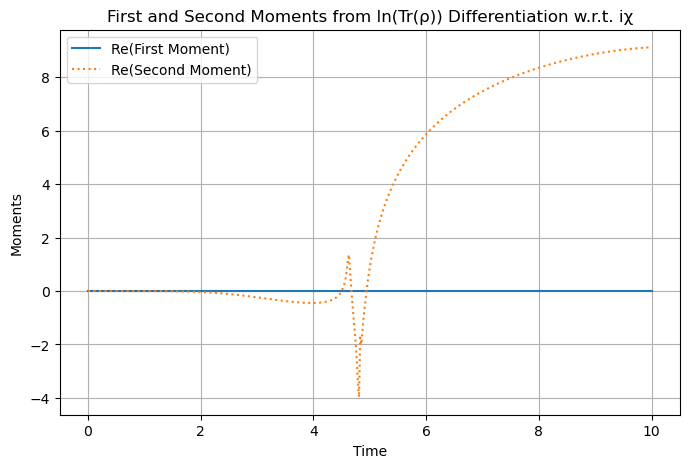

In [17]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Ensure chi values are complex for differentiation
# chi_vals = np.array(chi_vals, dtype=real) 

ln_trace = []
phase_trace = []  # To store phase information separately

# Small value to prevent log(0)
epsilon = 1e-12  

for i, chi in enumerate(chi_vals):
    t_vals = t_eval  # Ensure same time points

    # Interpolate rho_chis_00 and rho_chis_11 onto t_eval
    rho_00_interp = interp1d(rho_chis_00[i].t, rho_chis_00_complex[i], kind="cubic", fill_value="extrapolate")(t_eval)
    rho_11_interp = interp1d(rho_chis_11[i].t, rho_chis_11_complex[i], kind="cubic", fill_value="extrapolate")(t_eval)

    # Compute trace
    trace = rho_00_interp + rho_11_interp

    # Avoid log(0) by adding a small epsilon value
    trace_safe = np.where(np.abs(trace) < epsilon, epsilon, trace)

    # Compute log safely (magnitude only)
    ln_trace.append(np.log(np.abs(trace_safe)))  

    # Store phase separately if needed
    phase_trace.append(np.angle(trace_safe))

# Convert lists to arrays
ln_trace = np.array(ln_trace)
phase_trace = np.array(phase_trace)

# Numerical differentiation: d/d(i*χ) [ln(trace)]
dln_trace = np.gradient(ln_trace, chi_vals.real, axis=0) / (1j)  # Divide by i * dχ

# Extract first moment at χ = 0
first_moment = dln_trace[0]

# Compute second moment (second derivative)
d2ln_trace = np.gradient(dln_trace, chi_vals, axis=0) / (1j)
second_moment = d2ln_trace[0]

# Plot first moment
plt.plot(t_eval, first_moment.real, label="Re(First Moment)")
# plt.plot(t_eval, first_moment.imag, linestyle="dashed", label="Im(First Moment)")

# Plot second moment
plt.plot(t_eval, second_moment.real, label="Re(Second Moment)", linestyle="dotted")
# plt.plot(t_eval, second_moment.imag, linestyle="dashdot", label="Im(Second Moment)")

plt.xlabel("Time")
plt.ylabel("Moments")
plt.legend()
plt.title("First and Second Moments from ln(Tr(ρ)) Differentiation w.r.t. iχ")
plt.grid()
plt.show()

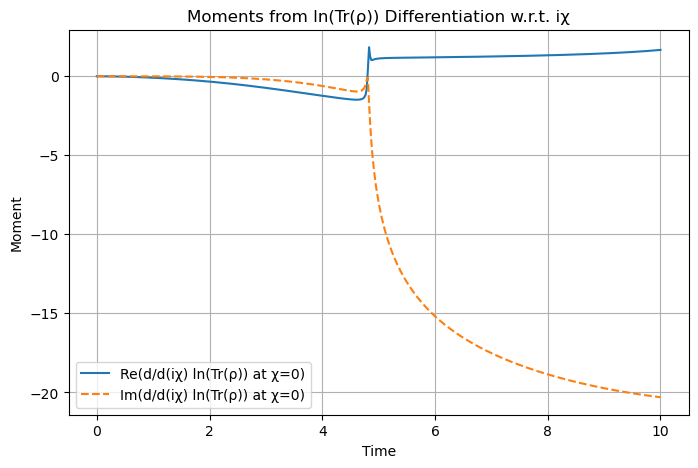

In [18]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Convert chi values to an array for differentiation
chi_vals = np.array(chi_vals, dtype=np.complex128)  # Ensure complex type for differentiation

ln_trace = []

for i, chi in enumerate(chi_vals):
    t_vals = t_eval  # Ensure same time points

    # Interpolate rho_chis_00 and rho_chis_11 onto t_eval
    rho_00_interp = interp1d(rho_chis_00[i].t, rho_chis_00_complex[i], kind="cubic", fill_value="extrapolate")(t_eval)
    rho_11_interp = interp1d(rho_chis_11[i].t, rho_chis_11_complex[i], kind="cubic", fill_value="extrapolate")(t_eval)

    # Compute trace
    trace = rho_00_interp + rho_11_interp

    # Compute ln(trace), handling log of complex numbers correctly
    ln_trace.append(np.log(trace))

ln_trace = np.array(ln_trace)  # Convert list to array

# **Fix: Use np.gradient with full chi_vals.real**
dln_trace = np.gradient(ln_trace, chi_vals.real, axis=0) / (1j)  # Divide by i * dχ

# Extract the derivative at χ = 0 (assuming chi_vals[0] = 0)
moments = dln_trace[0]

# Plot moments
plt.plot(t_eval, moments.real, label="Re(d/d(iχ) ln(Tr(ρ)) at χ=0)")
plt.plot(t_eval, moments.imag, linestyle="dashed", label="Im(d/d(iχ) ln(Tr(ρ)) at χ=0)")

plt.xlabel("Time")
plt.ylabel("Moment")
plt.legend()
plt.title("Moments from ln(Tr(ρ)) Differentiation w.r.t. iχ")
plt.grid()
plt.show()


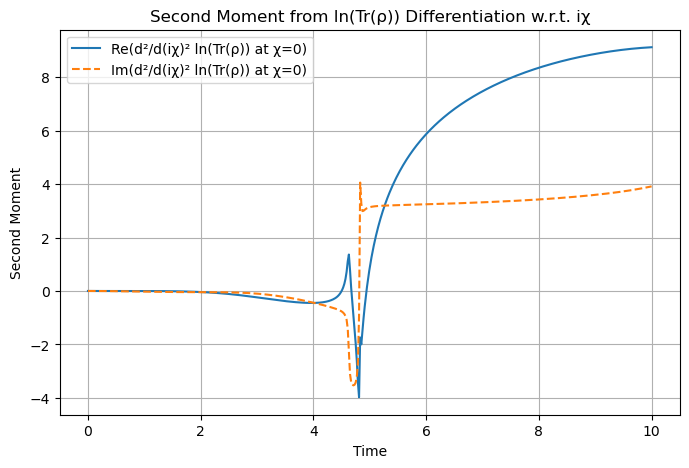

In [19]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Convert chi values to an array for differentiation
chi_vals = np.array(chi_vals, dtype=np.complex128)  # Ensure complex type for differentiation

ln_trace = []

for i, chi in enumerate(chi_vals):
    t_vals = t_eval  # Ensure same time points

    # Interpolate rho_chis_00 and rho_chis_11 onto t_eval
    rho_00_interp = interp1d(rho_chis_00[i].t, rho_chis_00_complex[i], kind="cubic", fill_value="extrapolate")(t_eval)
    rho_11_interp = interp1d(rho_chis_11[i].t, rho_chis_11_complex[i], kind="cubic", fill_value="extrapolate")(t_eval)

    # Compute trace
    trace = rho_00_interp + rho_11_interp

    # Compute ln(trace), handling log of complex numbers correctly
    ln_trace.append(np.log(trace))

ln_trace = np.array(ln_trace)  # Convert list to array

# **First derivative (first moment)**
dln_trace = np.gradient(ln_trace, chi_vals.real, axis=0) / (1j)  # First derivative: d/d(iχ)

# **Second derivative (second moment)**
d2ln_trace = np.gradient(dln_trace, chi_vals.real, axis=0) / (1j)  # Second derivative: d²/d(iχ)²

# Extract the second moment at χ = 0 (assuming chi_vals[0] = 0)
second_moment = d2ln_trace[0]

# Plot second moment
plt.plot(t_eval, second_moment.real, label="Re(d²/d(iχ)² ln(Tr(ρ)) at χ=0)")
plt.plot(t_eval, second_moment.imag, linestyle="dashed", label="Im(d²/d(iχ)² ln(Tr(ρ)) at χ=0)")

plt.xlabel("Time")
plt.ylabel("Second Moment")
plt.legend()
plt.title("Second Moment from ln(Tr(ρ)) Differentiation w.r.t. iχ")
plt.grid()
plt.show()
